# Watershed Problem

Given a 2D surface in 3D space, find the distinct watersheds in it. 

In other words, if you have a three-dimensional landcsape, you want to find the different regions where all rainfall flows down to the same final location.  

Your input will be a n by n matrix of integers, where the high integers denotes peaks and hills while low integers denotes valleys.

In [25]:
heights = [[1,2,3,4],[1,2,1,0],[1,0,1,0],[0,0,1,4]]

class position():
    def __init__(self, coordinates, height):
        self.coordinates = coordinates
        self.height = height
        
    def __repr__(self):
        return ','.join([str(self.coordinates), str(self.height)])

To kick us off, I will draw this landscape, using a matplotlib heatmap function that shows the highest altitude in red, down to the lowest altitudes in blue:

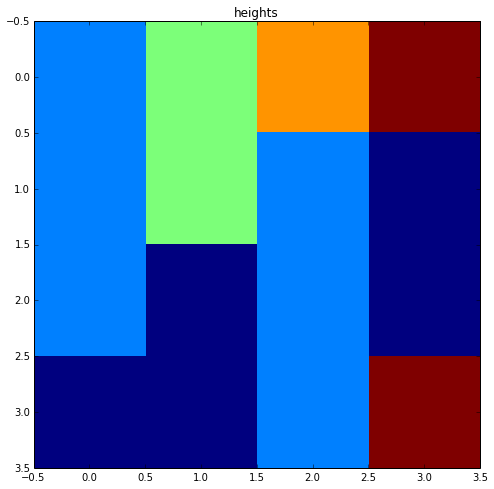

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates
plt.rcParams['figure.figsize'] = (20.0, 8.0)
plt.figure()
plt.imshow(heights , interpolation='nearest', cmap='jet')
plt.title('heights')
plt.show()

We have to make a decision. Should the water always flow down the steepest slope? Let's assume yes, even tho it may upset Ian Malcolm from Jurassic Park:

 ![Chaos Theory](http://1.media.dorkly.cvcdn.com/66/53/512dcfefefe5df458f66dee088818cf4.gif)
 
 Should it pool together when the slope is 0? This describes the 3 adjacent blocks of height Zero in the heights matrix, drawn above. I'd argue yes. In order to guarantee that adjacent blocks of equal height pool together, I will initialize the slopes array to have a slope of -1. 

In [27]:
watersheds = [[None] * len(heights) for x in range(len(heights))]
slopes = [[-1] * len(heights) for x in range(len(heights))]

The watershed matrix stores an integer for each cell. When Cells in that matrix that share the same integer, it means they belong to the same watershed.

The slopes matrix stores the steepest slope that the water can flow in each cell

In [28]:
import operator

def initialize_positions(heights):
    positions = []      
    for i in range(len(heights)):
        for j in range(len(heights)):
            positions.append(position((i,j), heights[i][j]))
    positions.sort(key=operator.attrgetter('height'))
    return positions

positions = initialize_positions(heights)

Our strategy is to sort positions from deepest to highest. Starting at the deepest, let's find all adjacent positions that would flow into it. We determine those positions by using the flow_up function. We continue this search from each of the new positions we have just moved up to, until every cell in the slopes array has been visited. 

In [29]:
# Will return all neighbors where the slope to the current position is steeper than we have yet seen.
def flow_up(heights, (i, j)):
    up_coordinates = set()
    neighbor_coordinates = set()
    local_height = heights[i][j]
    
    # look up, down, left, right
    neighbor_coordinates.add((max(i - 1, 0),j))
    neighbor_coordinates.add((min(i + 1, len(heights) - 1),j))
    neighbor_coordinates.add((i,max(j - 1, 0)))
    neighbor_coordinates.add((i,min(j + 1, len(heights) - 1)))
    
    for c in neighbor_coordinates:
        slope = heights[c[0]][c[1]] - local_height
        if slope > slopes[c[0]][c[1]]:
            slopes[c[0]][c[1]] = slope
            up_coordinates.add(c)
    return up_coordinates

def main():    
    for k, position in enumerate(positions):
        if watersheds[position.coordinates[0]][position.coordinates[1]] == None:
            new_coordinates = [position.coordinates]
            while len(new_coordinates) > 0:
                for (i, j) in new_coordinates:
                    watersheds[i][j] = k
                past_coordinates = list(new_coordinates)
                new_coordinates = set()
                for coordinates in past_coordinates:
                    new_coordinates.update(flow_up(heights, coordinates))
    
main()
print watersheds
print slopes

[[1, 1, 0, 0], [1, 1, 0, 0], [1, 1, 0, 0], [1, 1, 1, 0]]
[[0, 1, 2, 4], [0, 2, 1, 0], [1, 0, 1, 0], [0, 0, 1, 4]]


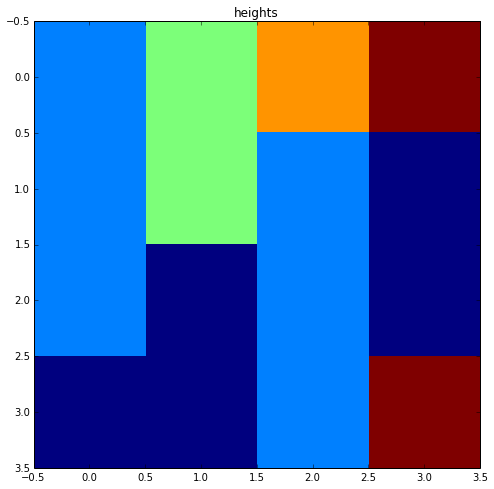

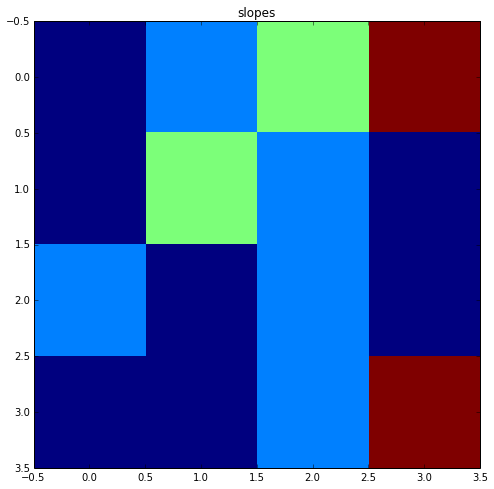

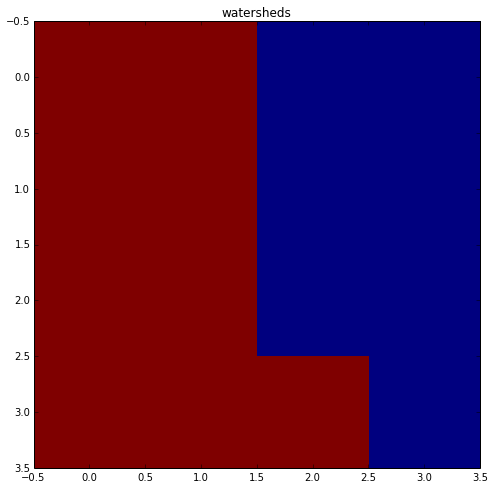

In [30]:
plt.rcParams['figure.figsize'] = (20.0, 8.0)
plt.figure()
plt.imshow(heights , interpolation='nearest', cmap='jet')
plt.title('heights')
plt.figure()
plt.imshow(slopes , interpolation='nearest', cmap='jet')
plt.title('slopes')
plt.figure()
plt.imshow(watersheds , interpolation='nearest', cmap='jet')
plt.title('watersheds')

Let's do a simple test of our functions. Let's give it a landscape that looks like a wide staircase and make sure the output is just a single watershed.

In [18]:
n = 10

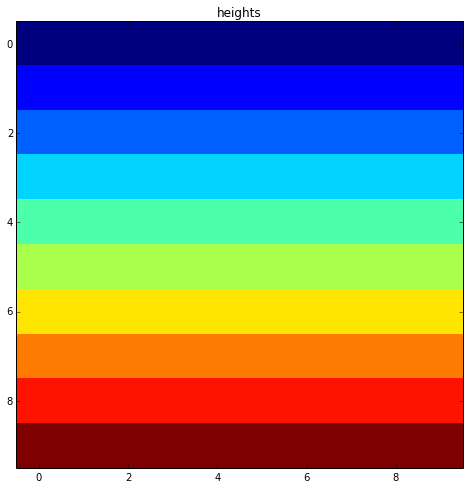

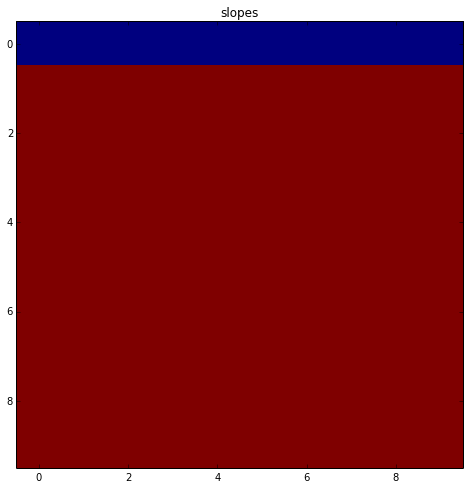

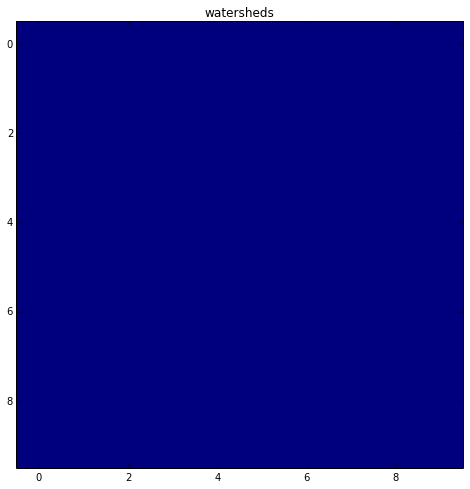

In [20]:
heights = [[x] * n for x in range(n)]
watersheds = [[None] * len(heights) for x in range(len(heights))]
slopes = [[-1] * len(heights) for x in range(len(heights))]
positions = initialize_positions(heights)
positions.sort(key=operator.attrgetter('height'))
main()
plt.figure()
plt.imshow(heights , interpolation='nearest', cmap='jet')
plt.rcParams['figure.figsize'] = (20.0, 8.0)
plt.title('heights')
plt.figure()
plt.imshow(slopes , interpolation='nearest', cmap='jet')
plt.title('slopes')
plt.figure()
plt.imshow(watersheds , interpolation='nearest', cmap='jet')
plt.title('watersheds')

It's interesting in this single-watershed case to see how simple the slopes object becomes. Either water is spreading in a flat basin (slope of 0) or it is flowing down the staircase (slope of 1). 

Now we can showcase the watershed code on a random input landscape

In [21]:
import random
heights = [[random.randint(0, n) for x in range(n)] for x in range(n)]

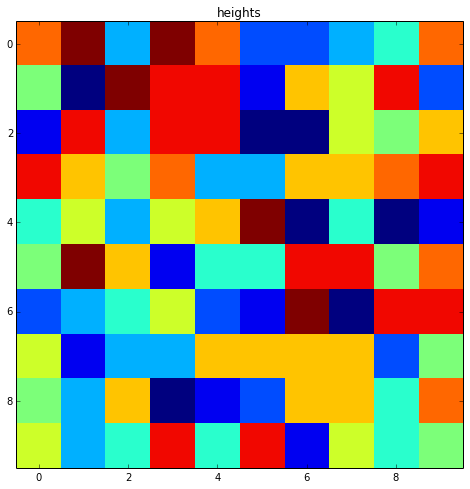

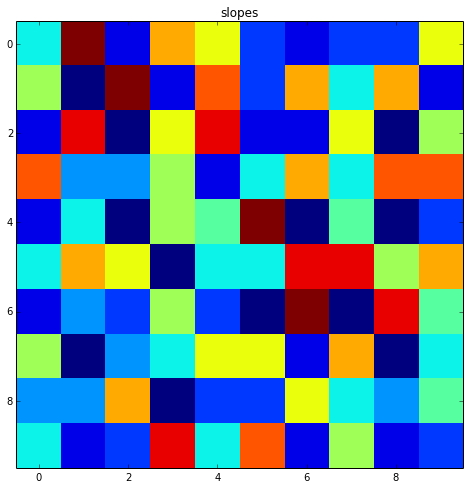

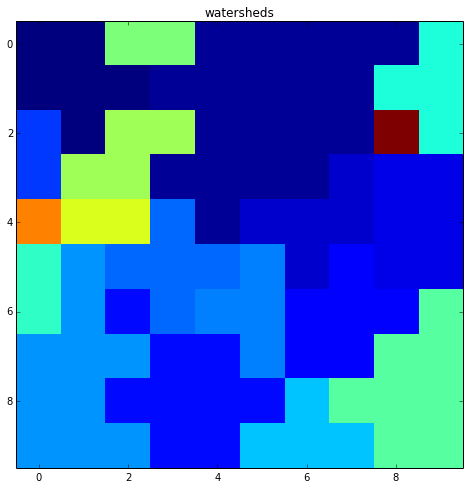

In [22]:
watersheds = [[None] * len(heights) for x in range(len(heights))]
slopes = [[-1] * len(heights) for x in range(len(heights))]
positions = initialize_positions(heights)
main()
plt.figure()
plt.imshow(heights , interpolation='nearest', cmap='jet')
plt.rcParams['figure.figsize'] = (20.0, 8.0)
plt.title('heights')
plt.figure()
plt.imshow(slopes , interpolation='nearest', cmap='jet')
plt.title('slopes')
plt.figure()
plt.imshow(watersheds , interpolation='nearest', cmap='jet')
plt.title('watersheds')

It becomes apparent in this case that we have the deepest blue represent the deepest well. This is because we sorted the positions by height at the beginning. 